<center><h2>ФБ-33 Стогнійчук Інна</h2>
<h3>Лабораторна робота №5</h3>
<h3>Візуалізація даних</h3>
<h3>Завдання 3</h3></center>

In [13]:
import numpy as np
from bokeh.plotting import figure, curdoc
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Slider, CheckboxGroup, ColorPicker, Button, Select
import subprocess


#### Початкові значення параметрів та функція harmonic_with_noise


In [14]:
amplitude_init = 1
frequency_init = 1
phase_init = 0
noise_mean_init = 0
noise_covariance_init = 0.1
show_noise_init = True
noise_init = np.random.normal(0, 1, 1000)


def harmonic_with_noise(t, amplitude, frequency, phase, noise_mean, noise_covariance, show_noise):
    harmonic_signal = amplitude * np.sin(2 * np.pi * frequency * t + phase) #y(t) = A ∗ sin(ω ∗ t + φ)
    if show_noise:
        scaled_noise = noise_mean + np.sqrt(noise_covariance) * noise_init
        harmonic_signal += scaled_noise
    return harmonic_signal

#### Реалізуйте ваш власний фільтр, використовуючи виключно Python (а також numpy, але виключно для операцій з масивами numpy.ndarray). Застосуйте фільтр. Ця функція ефективна для видалення шуму з сигналу та збереження його основних характеристик, оскільки вона використовує медіанне значення, яке не чутливе до викидів у вихідних даних.

In [15]:
def median_filter(signal, window_size):
    filtered_signal = np.zeros_like(signal)
    half_window = window_size // 2

    for i in range(half_window, len(signal) - half_window):
        window = signal[i - half_window:i + half_window + 1]
        filtered_signal[i] = np.median(window)

    return filtered_signal

##### Створюємо графіки

In [16]:
# Генеруємо часову ось
t = np.linspace(0, 10, 1000)
y = harmonic_with_noise(t, amplitude_init, frequency_init, phase_init, noise_mean_init, noise_covariance_init, show_noise_init)
filtered = median_filter(y, window_size=5)

# Створюємо джерело даних для графіків
source = ColumnDataSource(data=dict(t=t, y=y, filtered=filtered))

# Створюємо графік для зашумленої гармоніки
p1 = figure(title="Графік гармоніки y(t) = A ∗ sin(ω ∗ t + φ)", x_axis_label='Час', y_axis_label='Амплітуда', width=1200, height=250)
line = p1.line('t', 'y', source=source, line_width=2, line_color="darkorchid")

# Створюємо графік для відфільтрованого сигналу
p2 = figure(title="Відфільтрована гармоніка", x_axis_label='Час', y_axis_label='Амплітуда', width=1200, height=250)
line2 = p2.line('t', 'filtered', source=source, line_width=2, line_color="blue")


#### Створюємо слайдери

In [17]:

amplitude_slider = Slider(start=0.1, end=10, value=amplitude_init, step=0.1, title="Амплітуда")
frequency_slider = Slider(start=0.1, end=10, value=frequency_init, step=0.1, title="Частота")
phase_slider = Slider(start=0, end=2*np.pi, value=phase_init, step=0.1, title="Фазовий зсув")
noise_mean_slider = Slider(start=-1, end=1, value=noise_mean_init, step=0.1, title="Амплітуда шуму")
noise_cov_slider = Slider(start=0, end=1, value=noise_covariance_init, step=0.01, title="Дисперсія шуму")
show_noise_checkbox = CheckboxGroup(labels=["Show Noise"], active=[0])
reset_button = Button(label="Reset", button_type="warning")
window_size_select = Select(title="Window Size", options=["1", "3", "5", "7", "9", "11"], value="6")

#### Оновлюємо дані при зміні параметрів

In [18]:

def update(attrname, old, new):
    amplitude = amplitude_slider.value
    frequency = frequency_slider.value
    phase = phase_slider.value
    noise_mean = noise_mean_slider.value
    noise_covariance = noise_cov_slider.value
    show_noise = 0 in show_noise_checkbox.active
    window_size = int(window_size_select.value)

    y = harmonic_with_noise(t, amplitude, frequency, phase, noise_mean, noise_covariance, show_noise)
    filtered = median_filter(y, window_size=window_size)

    source.data = dict(t=t, y=y, filtered=filtered)
    p1.line('t', 'y', source=source, line_width=2, line_color="darkorchid")
    p2.line('t', 'filtered', source=source, line_width=2, line_color="blue")

#### Функція "reset"

In [19]:

def reset():
    amplitude_slider.value = amplitude_init
    frequency_slider.value = frequency_init
    phase_slider.value = phase_init
    noise_mean_slider.value = noise_mean_init
    noise_cov_slider.value = noise_covariance_init
    global noise_init
    noise_init = np.random.normal(0, 1, 1000)


#### Обробники подій до слайдерів і чекбокса

In [20]:
amplitude_slider.on_change('value', update)
frequency_slider.on_change('value', update)
phase_slider.on_change('value', update)
noise_mean_slider.on_change('value', update)
noise_cov_slider.on_change('value', update)
show_noise_checkbox.on_change('active', update)
reset_button.on_click(reset)
window_size_select.on_change('value', update)

#### Задання виду

In [22]:
# Розмістимо слайдери в два стовпці
slider_layout = column(
    row(p1),
    row(p2),
    row(amplitude_slider, frequency_slider, phase_slider),
    row(noise_mean_slider, noise_cov_slider, reset_button, show_noise_checkbox, window_size_select)
)

layout = column(slider_layout)
curdoc().add_root(layout)



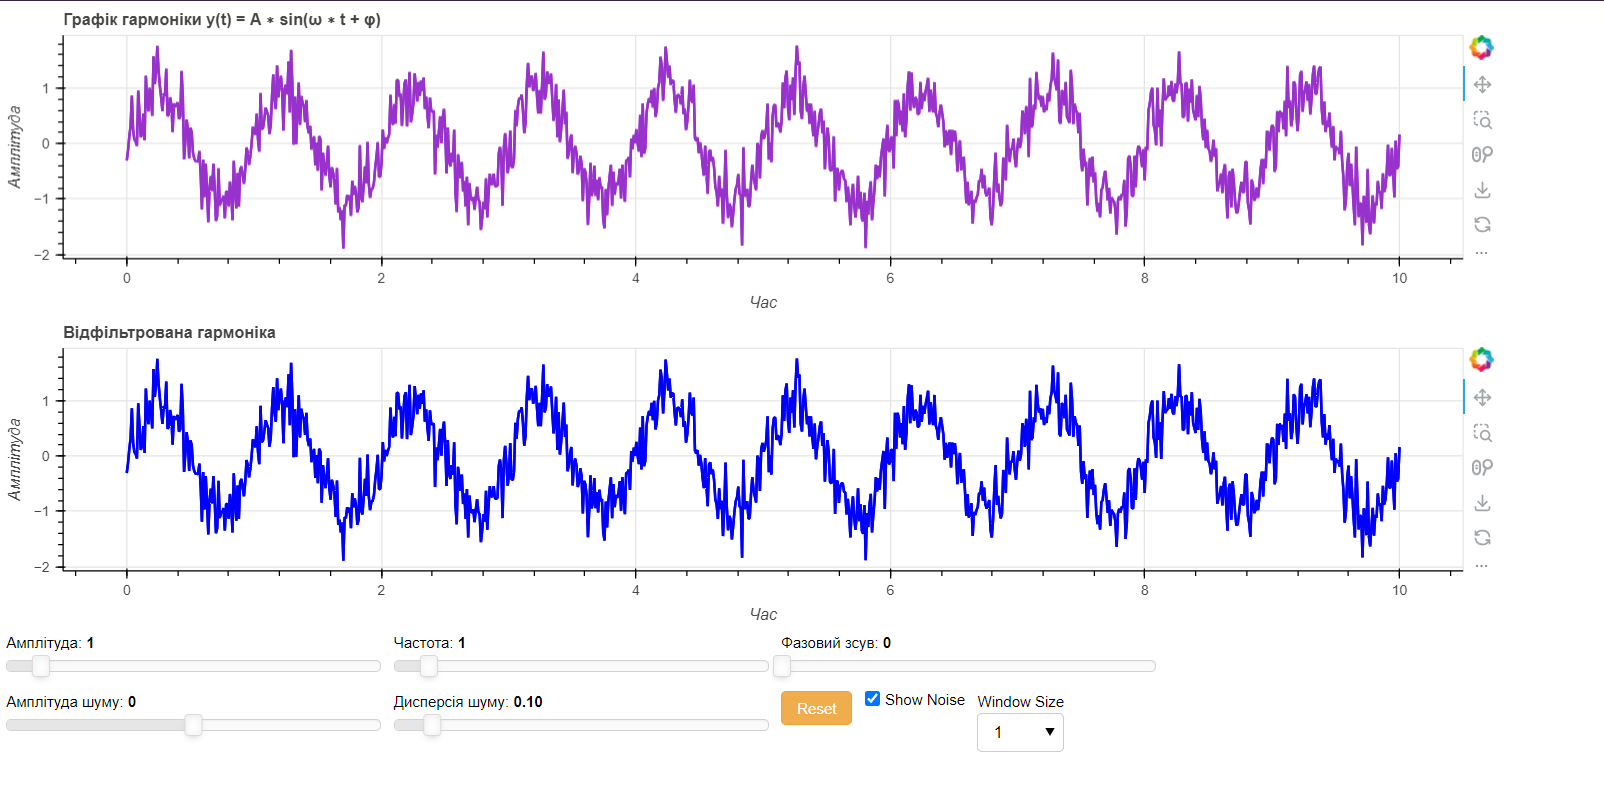